In [ ]:
import csv
import pandas as pd
import glob
import re
import matplotlib.pyplot as plt

##### Clean up indexAtoZ file from mass.gov 
https://www.mass.gov/lists/district-court-complaint-manual

In [23]:
# script for removing commas and then inserting commas on column splits of
# initial file where data from pdf was copy and pasted into a csv

# with open("../data/categorize_charges/input.csv", 'r') as input_csv:
#     csv_reader = csv.reader(input_csv)
    
#     with open("../data/categorize_charges/output.csv", 'w') as output_csv:
#         csv_writer = csv.writer(output_csv)
        
#         for line in csv_reader:
#             lineStr = ""
#             lineStr = lineStr.join(line)
#             lineStr = lineStr.replace(",", "", 5)
#             firstSpace = lineStr.find(" ")
#             lineStr = lineStr[:firstSpace]+","+lineStr[firstSpace:]
#             if(lineStr.find("§") < 0):
#                 continue
#             secondSpace = lineStr.find(" ", lineStr.find("§")+3)
#             lineStr = lineStr[:secondSpace]+","+lineStr[secondSpace:]
#             thirdSpace = lineStr.find(" ", secondSpace+2)
#             lineStr = lineStr[:thirdSpace]+","+lineStr[thirdSpace:]
#             fourthSpace = lineStr.find(" ", thirdSpace+2)
#             lineStr = lineStr[:fourthSpace]+","+lineStr[fourthSpace:]
#             fifthSpace = lineStr.find(" ", fourthSpace+2)
#             lineStr = lineStr[:fifthSpace]+","+lineStr[fifthSpace:]
#             line[0] = lineStr
#             csv_writer.writerow(line)

#             print(line)

In [24]:
# script for stripping quotes and new line from each row after manual processing of:
# converted_complaint_manual_index_AtoZ.csv

# with open("../data/categorize_charges/converted_complaint_manual_index_AtoZ.csv", 'r') as input2_csv:
    
#     with open("../data/categorize_charges/output2.csv", 'w') as output2_csv:
#         for line in input2_csv:
#             print(line)
#             line = line.strip('”"“\n')
#             print(line)
#             output2_csv.write(line+'\n')

In [25]:
#function to find the columns that appear in both lists

# def colIntersect(col1,col2):
#     col2Set = set()
#     colList = []
    
#     for c2 in col2:
#         col2Set.add(c2.lower())
    
#     for c1 in col1:
#         c1lower = c1.lower()
#         if(c1lower in col2Set):
#             colList.append(c1lower)
#     return colList
    
    

##### Renamed output from above to output2.csv and import as indexAtoZ_df 

In [26]:
indexAtoZ_df = pd.read_csv("../data/categorize_charges/output2.csv", quotechar="'")
indexAtoZ_df.head()
indexAtoZ_df.shape

(5812, 6)

In [27]:
expOfCodes_df = pd.read_csv("../data/categorize_charges/explanation_of_codes.csv")
expOfCodes_df

,Column,Code,Description
0,municip_code_col,ABI,Abington
1,municip_code_col,BAR,Barnstable
2,municip_code_col,BRI,Bridgewater
3,municip_code_col,BRO,Brockton
4,municip_code_col,EAS,East Bridgewater
5,municip_code_col,SAD,Sandwich
6,municip_code_col,WEG,West Bridgewater
7,municip_code_col,WHI,Whitman
8,municip_code_col,YAR,Yarmouth
9,f/m_col,F,Felony


In [28]:
#get last row of unique offense code 
#this removes duplicate rows where offense is the same but effective dates are different

uniq_offense_df = indexAtoZ_df.drop_duplicates(subset="Offense Code", keep='last', inplace=False)
uniq_offense_df.head()


,Offense Code,Offense,Effective Dates(s),F/M,Stats,Fine
1,265/13A/B,A&B c265 §13A(a),5/22/02,M+,09,A
2,265/13K/F,A&B ON +60/DISABLED c265 §13K(a½),4/11/05,F,09,A
3,265/13K/A,A&B ON +60/DISABLED WITH INJURY c265 §13K(b),3/17/96,F,09,A
4,265/13K/B,A&B ON +60/DISABLED WITH SERIOUS INJURY c265 §...,3/17/96,F,09,A
6,265/13I/B,A&B ON AMBULANCE PERSONNEL c265 §13I,9/30/10,M+,09,A


In [29]:
# add a OffenseMatch column where Offense column is uppercased and stripped of non alphanumeric characters

uniq_offense_df.loc[:, "OffenseMatch"] = uniq_offense_df.loc[:, "Offense"].str.upper()
uniq_offense_df.loc[:, "OffenseMatch"] = uniq_offense_df.loc[:, "OffenseMatch"].str.replace('\s+|Â|[^0-9a-zA-Z]','', regex=True)
uniq_offense_df.head()

/home/linna/Apps/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
/home/linna/Apps/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


,Offense Code,Offense,Effective Dates(s),F/M,Stats,Fine,OffenseMatch
1,265/13A/B,A&B c265 §13A(a),5/22/02,M+,09,A,ABC26513AA
2,265/13K/F,A&B ON +60/DISABLED c265 §13K(a½),4/11/05,F,09,A,ABON60DISABLEDC26513KA
3,265/13K/A,A&B ON +60/DISABLED WITH INJURY c265 §13K(b),3/17/96,F,09,A,ABON60DISABLEDWITHINJURYC26513KB
4,265/13K/B,A&B ON +60/DISABLED WITH SERIOUS INJURY c265 §...,3/17/96,F,09,A,ABON60DISABLEDWITHSERIOUSINJURYC26513KC
6,265/13I/B,A&B ON AMBULANCE PERSONNEL c265 §13I,9/30/10,M+,09,A,ABONAMBULANCEPERSONNELC26513I


##### middlesex data

##### County level data

In [30]:
# columns of interest that appear in all middlesex, northwest, and suffolk
output_view = ["Offense Date","Charge", "Disposition", "Expungeable", "sex", "murder" ]

In [31]:
middlesex_df = pd.read_csv("../data/cleaned/clean_middlesex.csv", low_memory=False)
middlesex_df.columns
middlesex_df.shape
middlesex_df.head()

,Case Number,Offense Date,Court Location,Charge,Charge/Crime Type,Disposition,Chapter,Section,Paragraph,JuvenileC,years_since_offense,sex,murder,Expungeable,Offenses_per_case,Inc_Expungeable_Attempts_Are,guilty,Incident_Guilty_or_missing
0,14-01-479818,2013-12-30,SOM,"LICENSE SUSPENDED, OP MV WITH c90 Â§23",Drugs/Distribution/Possession with Intent,GUILTY FILED,90,23,D,False,6.7,0,0.0,Yes,2,True,True,True
1,14-01-479826,2013-12-29,LOW,"LICENSE SUSPENDED, OP MV WITH c90 Â§23",Drugs/Possession,NOLLE PROSEQUI,90,23,D,False,6.7,0,0.0,Yes,6,True,False,False
2,14-01-479854,2013-12-31,SOM,"LICENSE SUSPENDED, OP MV WITH c90 Â§23",Motor Vehicle Other,DISMISSED W/O PREJUDICE,90,23,D,False,6.7,0,0.0,Yes,3,True,False,False
3,14-01-479887,2013-12-28,AYE,"LICENSE SUSPENDED, OP MV WITH c90 Â§23",Motor Vehicle Other,DISMISSED W/O PREJUDICE,90,23,D,False,6.7,0,0.0,Yes,2,True,False,True
4,14-01-479888,2013-05-19,CON,"LICENSE SUSPENDED, OP MV WITH c90 Â§23",Motor Vehicle Other,DISMISSED BY FINES,90,23,D,False,7.3,0,0.0,Yes,2,True,False,True


In [32]:
# add a OffenseMatch column where Offense column is uppercased and stripped of non alphanumeric characters
# this will be used to join with df_unique_offense
middlesex_df["OffenseMatch"] = middlesex_df["Charge"].str.upper()
middlesex_df["OffenseMatch"] = middlesex_df["OffenseMatch"].str.replace('\s+|Â|[^0-9a-zA-Z]','', regex=True)

middlesex_df[["Case Number","OffenseMatch"]]

,Case Number,OffenseMatch
0,14-01-479818,LICENSESUSPENDEDOPMVWITHC9023
1,14-01-479826,LICENSESUSPENDEDOPMVWITHC9023
2,14-01-479854,LICENSESUSPENDEDOPMVWITHC9023
3,14-01-479887,LICENSESUSPENDEDOPMVWITHC9023
4,14-01-479888,LICENSESUSPENDEDOPMVWITHC9023
...,...,...
387526,19-12-661383,LARCBYCHECK
387527,19-12-661396,LARCBYCHECK
387528,19-12-661398,LARCBYCHECK
387529,19-12-661398,LARCBYCHECK


In [33]:
# merged with left join in columns "F/M" and "Offense Code" using "OffenseMatch" column
merged_middlesex_df = middlesex_df.merge(uniq_offense_df[["F/M", "OffenseMatch", "Offense Code", "Stats"]], how='left', on='OffenseMatch', )

merged_middlesex_df_output = merged_middlesex_df[['Case Number', 'Offense Date', 'Court Location', 'Charge',
       'Charge/Crime Type', 'Disposition', 'Chapter', 'Section', 'Paragraph',
       'JuvenileC', 'years_since_offense', 'sex', 'murder', 'Expungeable',
       'Offenses_per_case', 'Inc_Expungeable_Attempts_Are', 'guilty',
       'Incident_Guilty_or_missing', "F/M", "Offense Code", "Stats", "OffenseMatch"]]
merged_middlesex_df_output.head(10)
# merged_middlesex_df_output.to_csv("../data/categorize_charges/merged_middlesex.csv")
# merged_middlesex_df[["Case Number", "Charge", "OffenseMatch", "Expungeable", "F/M", "Stats"]].shape


,Case Number,Offense Date,Court Location,Charge,Charge/Crime Type,Disposition,Chapter,Section,Paragraph,JuvenileC,...,murder,Expungeable,Offenses_per_case,Inc_Expungeable_Attempts_Are,guilty,Incident_Guilty_or_missing,F/M,Offense Code,Stats,OffenseMatch
0,14-01-479818,2013-12-30,SOM,"LICENSE SUSPENDED, OP MV WITH c90 Â§23",Drugs/Distribution/Possession with Intent,GUILTY FILED,90,23,D,False,...,0.0,Yes,2,True,True,True,NaN,NaN,NaN,LICENSESUSPENDEDOPMVWITHC9023
1,14-01-479826,2013-12-29,LOW,"LICENSE SUSPENDED, OP MV WITH c90 Â§23",Drugs/Possession,NOLLE PROSEQUI,90,23,D,False,...,0.0,Yes,6,True,False,False,NaN,NaN,NaN,LICENSESUSPENDEDOPMVWITHC9023
2,14-01-479854,2013-12-31,SOM,"LICENSE SUSPENDED, OP MV WITH c90 Â§23",Motor Vehicle Other,DISMISSED W/O PREJUDICE,90,23,D,False,...,0.0,Yes,3,True,False,False,NaN,NaN,NaN,LICENSESUSPENDEDOPMVWITHC9023
3,14-01-479887,2013-12-28,AYE,"LICENSE SUSPENDED, OP MV WITH c90 Â§23",Motor Vehicle Other,DISMISSED W/O PREJUDICE,90,23,D,False,...,0.0,Yes,2,True,False,True,NaN,NaN,NaN,LICENSESUSPENDEDOPMVWITHC9023
4,14-01-479888,2013-05-19,CON,"LICENSE SUSPENDED, OP MV WITH c90 Â§23",Motor Vehicle Other,DISMISSED BY FINES,90,23,D,False,...,0.0,Yes,2,True,False,True,NaN,NaN,NaN,LICENSESUSPENDEDOPMVWITHC9023
5,14-01-479900,2013-12-26,CON,"LICENSE SUSPENDED, OP MV WITH c90 Â§23",Motor Vehicle Other,DISMISSED BY FINES,90,23,D,False,...,0.0,Yes,1,True,False,False,NaN,NaN,NaN,LICENSESUSPENDEDOPMVWITHC9023
6,14-01-479904,2013-08-03,CON,"LICENSE SUSPENDED, OP MV WITH c90 Â§23",Motor Vehicle Other,DISMISSED BY FINES,90,23,D,False,...,0.0,Yes,1,True,False,False,NaN,NaN,NaN,LICENSESUSPENDEDOPMVWITHC9023
7,14-01-479907,2013-07-14,CON,"LICENSE SUSPENDED, OP MV WITH c90 Â§23",Motor Vehicle Other,DISMISSED BY FINES,90,23,D,False,...,0.0,Yes,2,True,False,False,NaN,NaN,NaN,LICENSESUSPENDEDOPMVWITHC9023
8,14-01-479910,2013-12-22,LOW,"LICENSE SUSPENDED, OP MV WITH c90 Â§23",Motor Vehicle Other,DISMISSED BY FINES,90,23,D,False,...,0.0,Yes,1,True,False,False,NaN,NaN,NaN,LICENSESUSPENDEDOPMVWITHC9023
9,14-01-479920,2013-12-31,LOW,"LICENSE SUSPENDED, OP MV WITH c90 Â§23",Motor Vehicle Other,DISMISSED BY FINES,90,23,D,False,...,0.0,Yes,2,True,False,True,NaN,NaN,NaN,LICENSESUSPENDEDOPMVWITHC9023


In [34]:
#number of rows in merged_middlesex_df - number of rows in middlesex_df
#there are more rows after left merging
print(len(merged_middlesex_df)-len(middlesex_df))

29741


In [35]:
#number of rows where "F/M" column is NaN
fm_nan_middlesex_df = merged_middlesex_df.loc[pd.isna(merged_middlesex_df["F/M"])]
# fm_nan_middlesex_df.head()
fm_nan_middlesex_df.shape


(127748, 22)

In [36]:
#grouped by charge/crime type and got count of rows with each type using case number column

ms_group_df = middlesex_df[["Case Number","Charge/Crime Type"]].groupby("Charge/Crime Type")
group_count = ms_group_df.count()
group_count.dropna(how="any")
ms_crimetype_top_10 = group_count.sort_values("Case Number", ascending=False,)
ms_crimetype_top_10 = ms_crimetype_top_10.head(10)

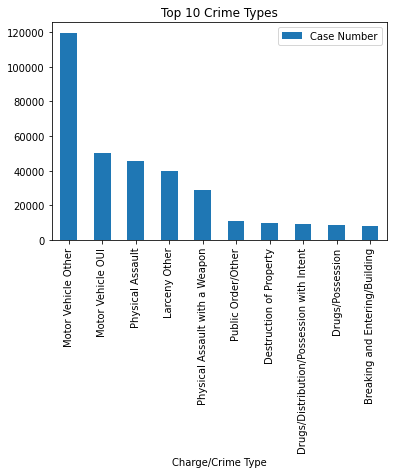

In [37]:
fig1 = ms_crimetype_top_10.plot(kind="bar")
plt.title("Top 10 Crime Types")
plt.show()

In [38]:
charge_type_map = merged_middlesex_df[["Charge", "Stats"]]
# charge_type_map.drop_duplicates(subset="OffenseMatch", keep='last', inplace=True)
charge_type_map.head()

,Charge,Stats
0,"LICENSE SUSPENDED, OP MV WITH c90 Â§23",NaN
1,"LICENSE SUSPENDED, OP MV WITH c90 Â§23",NaN
2,"LICENSE SUSPENDED, OP MV WITH c90 Â§23",NaN
3,"LICENSE SUSPENDED, OP MV WITH c90 Â§23",NaN
4,"LICENSE SUSPENDED, OP MV WITH c90 Â§23",NaN


In [39]:
#grouped by Stats and got count of rows with each type using case number column

filter_stats = charge_type_map["Stats"] == "1"
for row in charge_type_map[filter_stats]["Charge"].unique():
    print(row)
# charge_type_map.loc[filter_stats, "Stats"] = "01"

# stats_type_df = charge_type_map.groupby("Stats")

# stats_count = stats_type_df.count()


# expOfCodes2 = expOfCodes_df.rename(columns={"Code":"Stats"})

# ms_stats_top_10 = stats_count.merge(expOfCodes2[["Stats", "Description"]], how="left", on="Stats")
# ms_stats_top_10 = ms_stats_top_10.sort_values("Charge", ascending=False,)
# ms_stats_top_10

FIREARM, POSSESS LARGE CAPACITY c269 Â§10(m)
FIREARM VIOL WITH 1 PRIOR VIOLENT/DRUG CRIME c269 Â§10G(a)
TRAFFICKING OF PERSON FOR SEXUAL SERVITUDE c265 Â§50(a)
FIREARM IN FELONY, POSSESS LGE CAPACITY c265 Â§18B
SHOTGUN, POSSESS SAWED-OFF c269 Â§10(c)
FIREARM, SELL/TRANSFER LARGE CAPACITY c269 Â§10F(a)
TRAFFICKING OF PERSON UNDER 18 FOR SEXUAL SERVITUDE c265 Â§50(b)
TRAFFICKING OF PERSON UNDER 18 FOR FORCED SERVICES c265 Â§51(b)


In [40]:
# fig2 = ms_stats_top_10.plot(kind="bar")
# plt.title("Top 10 Stats Types")
# plt.show()

In [41]:
middlesex_df.columns

Index(['Case Number', 'Offense Date', 'Court Location', 'Charge',
       'Charge/Crime Type', 'Disposition', 'Chapter', 'Section', 'Paragraph',
       'JuvenileC', 'years_since_offense', 'sex', 'murder', 'Expungeable',
       'Offenses_per_case', 'Inc_Expungeable_Attempts_Are', 'guilty',
       'Incident_Guilty_or_missing', 'OffenseMatch'],
      dtype='object')

##### Northwestern data

In [42]:
northwest_df = pd.read_csv("../data/cleaned/clean_northwestern.csv")
northwest_df.head()
northwest_df.columns
# northwest_df.shape

Index(['Person ID', 'Court', 'Offense Date', 'Age at Offense', 'Filed',
       'Status', 'Count', 'Charge', 'Disposition', 'Dispo Date', 'Chapter',
       'Section', 'sex', 'murder', 'Expungeable', 'years_since_offense',
       'Incidents', 'Total Offenses per Person', 'Incidents per Person',
       'Inc_Expungeable_Attempts_Are', 'guilty', 'Incident_Guilty_or_missing'],
      dtype='object')

In [43]:
# add a OffenseMatch column where Offense column is uppercased and stripped of non alphanumeric characters
# this will be used to join with df_unique_offense

northwest_df["OffenseMatch"] = northwest_df["Charge"].str.upper()
northwest_df["OffenseMatch"] = northwest_df["OffenseMatch"].str.replace('\s+|Â|[^0-9a-zA-Z]','', regex=True)

northwest_df[["Person ID","OffenseMatch"]]


,Person ID,OffenseMatch
0,NW-0,ASSAULTTOMURDERC26515
1,NW-0,ASSAULTTOMURDERC26515
2,NW-0,ASSAULTTOMURDERC26515
3,NW-0,ASSAULTTOMURDERC26515
4,NW-0,ARSONOFDWELLINGHOUSEC2661
...,...,...
74159,NW-19752,KIDNAPPINGC26526
74160,NW-19752,ABPREGNANTVICTIM
74161,NW-19752,ASSAULTBATTERYONFAMILYHOUSEHOLDMEMBERC26513MA
74162,NW-19752,ASSAULTWDANGEROUSWEAPONC26515BB


In [44]:
merged_northwest_df = northwest_df.merge(uniq_offense_df[["F/M", "OffenseMatch", "Offense Code"]], how='left', on='OffenseMatch', )
merged_northwest_df[["Person ID", "Charge", "OffenseMatch", "Expungeable", "F/M"]].shape
merged_northwest_df.shape
merged_northwest_df_output = merged_northwest_df[['Person ID', 'Court', 'Offense Date', 'Age at Offense', 'Filed',
       'Status', 'Count', 'Charge', 'Disposition', 'Dispo Date', 'Chapter',
       'Section', 'sex', 'murder', 'Expungeable', 'years_since_offense',
       'Incidents', 'Total Offenses per Person', 'Incidents per Person',
       'Inc_Expungeable_Attempts_Are', 'guilty', 'Incident_Guilty_or_missing', 'F/M', 'Offense Code']]

# merged_northwest_df_output.head()
# merged_northwest_df.loc[pd.isna(merged_northwest_df["F/M"])]
# merged_northwest_df_output.to_csv("../data/categorize_charges/merged_northwest.csv")



##### Suffolk data

In [46]:
suff_df = pd.read_csv("../data/cleaned/clean_suffolk.csv")
suff_df.head()
suff_df.columns

Index(['Person ID', 'Court', 'Offense Date', 'Filed', 'Status', 'Count',
       'Charge', 'Type Crime', 'Code Ucc Ctgry', 'Disposition',
       'Description Disposition Reason', 'Dispo Date', 'Chapter', 'Section',
       'sex', 'murder', 'Expungeable', 'years_since_offense',
       'Total Offenses per Person', 'Incidents per Person', 'ExpAtt', 'sm',
       'guilty', 'Guilty'],
      dtype='object')

In [47]:
# add a OffenseMatch column where Offense column is uppercased and stripped of non alphanumeric characters
# this will be used to join with df_unique_offense

suff_df["OffenseMatch"] = suff_df["Charge"].str.upper()
suff_df["OffenseMatch"] = suff_df["OffenseMatch"].str.replace('\s+|Â|[^A-Za-z0-9]','', regex=True)
suff_df[["Person ID", "OffenseMatch"]]
suff_df.shape

(298438, 25)

In [48]:
merged_suff_df = suff_df.merge(uniq_offense_df[["OffenseMatch","F/M", "Offense Code"]], how="left", on="OffenseMatch")
merged_suff_df.shape

merged_suff_df_output = merged_suff_df[['Person ID', 'Court', 'Offense Date', 'Filed', 'Status', 'Count',
       'Charge', 'Type Crime', 'Code Ucc Ctgry', 'Disposition','Description Disposition Reason', 'Dispo Date', 'Chapter', 'Section',
       'sex', 'murder', 'Expungeable', 'years_since_offense','Total Offenses per Person', 'Incidents per Person', 'ExpAtt', 'sm',
       'guilty', 'Guilty','F/M','Offense Code']]

merged_suff_df_output.head()
# merged_suff_df_output.to_csv("../data/categorize_charges/merged_suff.csv")

,Person ID,Court,Offense Date,Filed,Status,Count,Charge,Type Crime,Code Ucc Ctgry,Disposition,...,Expungeable,years_since_offense,Total Offenses per Person,Incidents per Person,ExpAtt,sm,guilty,Guilty,F/M,Offense Code
0,SF-0,SUP,2015-11-04,2016-01-01,CL,1,"DRUG, DISTRIBUTE CLASS A, SUBSQ.OFF. c94C Ã‚Â§...",DR,F,Plea,...,Yes,4.8,4,1,True,False,True,NaN,F,94C/32/B
1,SF-0,SUP,2015-11-04,2016-01-01,CL,2,"COCAINE, DISTRIBUTE, SUBSQ.OFF. c94C Ã‚Â§32A(d)",DR,F,Plea,...,Yes,4.8,4,1,True,False,True,NaN,F,94C/32A/B
2,SF-0,SUP,2015-11-04,2016-01-01,CL,3,"DRUG, POSSESS TO DISTRIB CLASS A, SUBSQ. c94C ...",DR,F,Plea,...,Yes,4.8,4,1,True,False,True,NaN,NaN,NaN
3,SF-0,SUP,2015-11-04,2016-01-01,CL,4,"POSSESS TO DISTRIBUTE COCAINE, SUBSEQUENT. c94...",DR,F,Plea,...,Yes,4.8,4,1,True,False,True,NaN,NaN,NaN
4,SF-1,SUP,2014-10-23,2016-01-01,CL,1,A&B ON +60/DISABLED c265 Ã‚Â§13K/F,AS,NaN,Verdict - Jury Trial,...,No,5.9,21,9,False,False,False,NaN,NaN,NaN
